In [1]:
import numpy as np
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs

import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

gv.extension('matplotlib')

gv.output(fig='png', size=300)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
earth_df = gpd.read_file(
        gpd.datasets.get_path('naturalearth_lowres')
    )

In [3]:
# this file has been generated with DGGRID and dggrid4py
triangles = gpd.read_file('../data_archive/ISEA4T_L5.gpkg', layer='ISEA4T_L5')
triangles.sample()

,Name,geometry
4681,4682,"POLYGON ((-6.93529 -8.24789, -5.92739 -10.3373..."


In [4]:
from typing import Union, List
from shapely.geometry import mapping, Polygon, GeometryCollection
from shapely import affinity

# https://towardsdatascience.com/around-the-world-in-80-lines-crossing-the-antimeridian-with-python-and-shapely-c87c9b6e1513
# https://gist.github.com/PawaritL/ec7136c0b718ca65db6df1c33fd1bb11

def check_crossing(lon1: float, lon2: float, validate: bool = True):
    """
    Assuming a minimum travel distance between two provided longitude coordinates,
    checks if the 180th meridian (antimeridian) is crossed.
    """
    if validate and any(abs(x) > 180.0 for x in [lon1, lon2]):
        raise ValueError("longitudes must be in degrees [-180.0, 180.0]")   
    return abs(lon2 - lon1) > 180.0

def check_for_geom(geom):
    crossed = False
    p_init = geom.exterior.coords[0]

    for p in range(1, len(geom.exterior.coords)):
        px = geom.exterior.coords[p]
        # print(px)

        if check_crossing(p_init[0], px[0]):
            crossed = True
        p_init = px
    
    return crossed

In [5]:
triangles['crossed'] = triangles['geometry'].apply(check_for_geom)
triangles['crossed'].value_counts()

False    20290
True       190
Name: crossed, dtype: int64

In [6]:
geotx_cl = triangles.loc[triangles['crossed'] == False]

In [7]:
geotx_cl['centroids'] = geotx_cl['geometry'].centroid
geotx_cl_p = gpd.GeoDataFrame(geotx_cl, geometry='centroids', crs=4326)
touch_mask = gpd.overlay(geotx_cl_p, earth_df, how='intersection')

C:\dev\conda3\envs\geopy2020\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\dev\conda3\envs\geopy2020\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [8]:
geotx = geotx_cl.loc[geotx_cl['Name'].isin(touch_mask['Name'].values)]

In [9]:
len(geotx)

5913

In [10]:
geotx.columns

Index(['Name', 'geometry', 'crossed', 'centroids'], dtype='object')

In [11]:
mining = gpd.read_file('../data_archive/global_mining_polygons_v1.gpkg', layer='mining_polygons', driver='GPKG')

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute 

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (AREA)
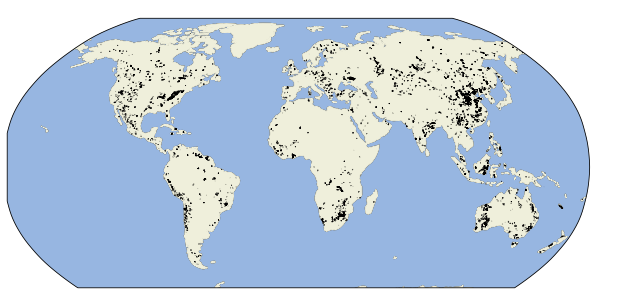

In [13]:
gf.ocean * gf.coastline * gf.land * gv.Polygons(mining, vdims=['AREA']).opts(projection=ccrs.Robinson() )

In [12]:
tri_minings = gpd.sjoin(geotx, mining, how='left', op='intersects', lsuffix='tri_', rsuffix='mining_')

In [13]:
tri_minings.sample(5)

,Name,geometry,crossed,centroids,index_mining_,ISO3_CODE,COUNTRY_NAME,AREA
16974,16975,"POLYGON ((119.70017 -29.50165, 121.70461 -28.5...",False,POINT (121.05546 -29.64325),1189.0,AUS,Australia,5.360232
1786,1787,"POLYGON ((-80.23900 40.41319, -78.75000 38.913...",False,POINT (-80.20537 39.22767),11000.0,USA,United States,0.304908
1208,1209,"POLYGON ((-66.71861 54.90826, -65.40921 52.844...",False,POINT (-67.06606 53.73032),16152.0,CAN,Canada,5.141393
9055,9056,"POLYGON ((122.40330 56.99131, 126.11024 56.101...",False,POINT (123.93132 55.97688),20709.0,RUS,Russian Federation,4.014139
1827,1828,"POLYGON ((-107.31163 29.07252, -107.16867 26.8...",False,POINT (-107.91507 27.95910),9856.0,MEX,Mexico,8.006487


In [14]:
len(tri_minings.Name.unique())

5913

In [15]:
len(geotx.Name.unique())

5913

In [16]:
tri_minings['AREA'] = tri_minings['AREA'].fillna(value=0)

<AxesSubplot:>

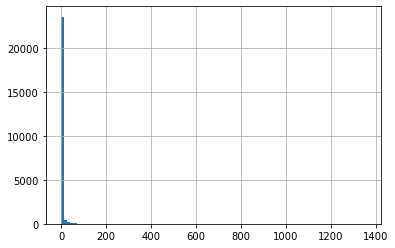

In [17]:
tri_minings['AREA'].hist(bins=100)

In [18]:
tri_minings['AREA'].describe(percentiles=[.1, .2, .3, .4, .5, .9])

count    24480.000000
mean         2.584364
std         19.553498
min          0.000000
10%          0.000000
20%          0.016339
30%          0.065838
40%          0.139212
50%          0.254743
90%          4.262183
max       1353.922227
Name: AREA, dtype: float64

In [19]:
import mapclassify as mc

quant = mc.FisherJenks(tri_minings['AREA'].values,k=5)
quant

FisherJenks               

     Interval        Count
--------------------------
[   0.00,   17.98] | 23824
(  17.98,   92.58] |   589
(  92.58,  370.46] |    62
( 370.46,  778.71] |     2
( 778.71, 1353.92] |     3

In [20]:
qt = mc.UserDefined(tri_minings['AREA'], bins=[0.1, 10, 20,1300])
qt

UserDefined               

     Interval        Count
--------------------------
[   0.00,    0.10] |  8560
(   0.10,   10.00] | 14728
(  10.00,   20.00] |   619
(  20.00, 1300.00] |   570
(1300.00, 1353.92] |     3

In [21]:
tri_minings['area_class'] = tri_minings[['AREA']].apply(qt)

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attr

:Polygons   [Longitude,Latitude]   (area_class)
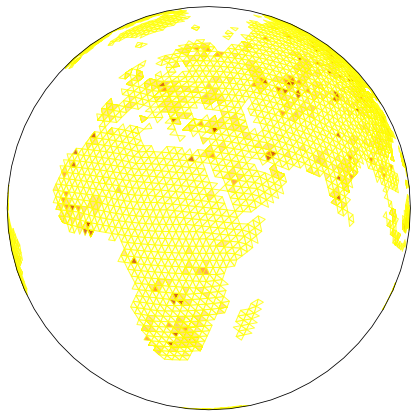

In [23]:
img = gv.Polygons(
    tri_minings, vdims=['area_class']
).opts( projection=ccrs.Orthographic(35, 15), edgecolor='yellow', lw=1, alpha=0.8,
    xaxis=None, yaxis=None, show_grid=False,
    show_frame=False, colorbar=False, fig_size=200, cmap='YlOrBr' )

img

In [25]:
gv.save(img, '../source/_static/day-08-yellow.png')

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attr

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribu

:Overlay
   .Ocean.I    :Feature   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (area_class)
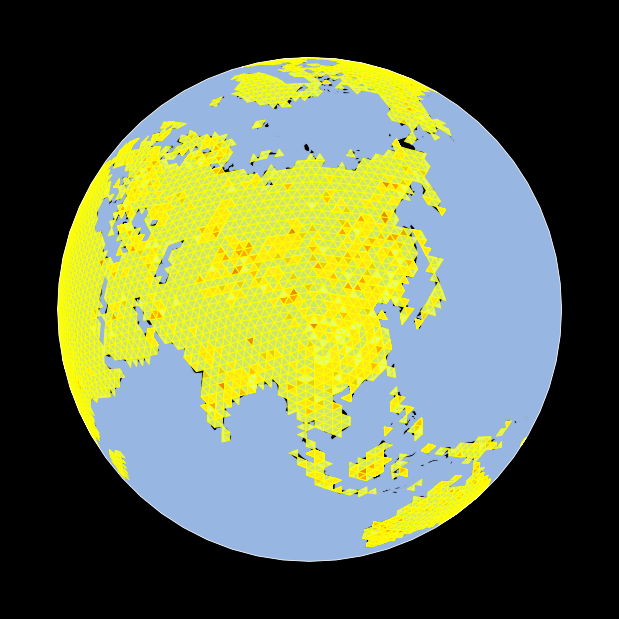

In [29]:
# plt.style.use('dark_background')

img3 = gf.ocean * gv.Polygons(
    tri_minings, vdims=['area_class']
).opts( projection=ccrs.Orthographic(100, 40), edgecolor='yellow', lw=1, alpha=0.9,
    xaxis=None, yaxis=None, show_grid=False,
    show_frame=False, colorbar=False, fig_size=300, cmap='Wistia' )

img3

In [ ]:
plt.style.use('dark_background')

from geoviews import opts, tile_sources as gvts

img3 = gvts.StamenToner * gv.Polygons(
    tri_minings, vdims=['area_class']
).opts( projection=ccrs.Orthographic(140, -25), edgecolor='yellow', lw=1, alpha=0.9,
    xaxis=None, yaxis=None, show_grid=False,
    show_frame=False, colorbar=False, fig_size=300, cmap='Wistia' )

img3

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attr

:Polygons   [Longitude,Latitude]   (area_class)
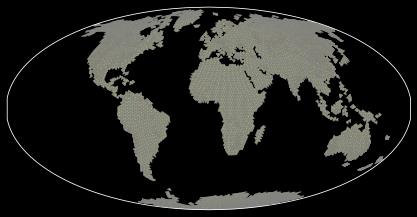

In [30]:
img3 = gv.Polygons(
    tri_minings, vdims=['area_class']
).opts( projection=ccrs.Mollweide(), edgecolor='grey', lw=1, alpha=0.9,
    xaxis=None, yaxis=None, show_grid=False,
    show_frame=False, colorbar=False, fig_size=200, cmap='Wistia' )

img3

